In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
     

# Loading data
data = pd.read_csv("Gotem Pumpkins.csv")
test = pd.read_csv("Freyja_Pumpkins.csv")
data.head()
test.head()


,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,63011,961.163,371.5589,216.5940,63511,283.2456,0.8125,0.9921,0.7301,0.8571,1.7155,0.7623,Çerçevelik
1,1,75917,1069.411,420.2925,230.6208,76613,310.9028,0.8360,0.9909,0.7132,0.8342,1.8224,0.7397,Çerçevelik
2,2,75988,1091.948,447.6035,217.3051,76566,311.0481,0.8742,0.9925,0.7079,0.8008,2.0598,0.6949,Ürgüp Sivrisi
3,3,85968,1168.743,479.1606,229.2326,87008,330.8442,0.8781,0.9880,0.7495,0.7909,2.0903,0.6905,Çerçevelik
4,4,85386,1138.193,438.2698,248.8453,86282,329.7224,0.8232,0.9896,0.7093,0.8283,1.7612,0.7523,Çerçevelik


In [44]:
# Removing unnecessary columns and handling missing values
train_gotem_df = data.drop(["Unnamed: 0"], axis=1).dropna()
test_freyja_df = test.drop(["Unnamed: 0"], axis=1).dropna()

# Binary encode function
def binary(datan, column_name, value_for_zero, value_for_one):
    binary_converting = {value_for_zero: 0, value_for_one: 1}
    datan[column_name] = datan[column_name].replace(binary_converting)
    return datan

# Binary encoding for target variables
train_gotem_df = binary(train_gotem_df, 'Class', 'Ürgüp Sivrisi', 'Çerçevelik')
test_freyja_df = binary(test_freyja_df, 'Class', 'Ürgüp Sivrisi', 'Çerçevelik')

# Selecting features
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 
            'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 
            'Aspect_Ration', 'Compactness']

# Splitting data into features (X) and target (y)
X_train = train_gotem_df[features].values.astype('float64')
y_train = train_gotem_df['Class'].values
X_test = test_freyja_df[features].values.astype('float64')
y_test = test_freyja_df['Class'].values

C:\Users\mahek\AppData\Local\Temp\ipykernel_13292\4232600020.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datan[column_name] = datan[column_name].replace(binary_converting)


In [45]:


# Z-score normalization
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Checking the shapes of the arrays
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (2000, 12)
Shape of y_train: (2000,)


In [46]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [47]:
# Cost function
def cost(x, y, weights, bias):
    m = len(y)
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    return -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

In [48]:
def log_likelihood(x, y, weights, bias):
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    return np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [49]:
# Logistic regression with gradient descent
def logistic_regression(X, y, weights, bias, alpha, iterations):
    m = len(y)
    cost_history = []
    log_history = []

    for i in range(iterations):
        # Predictions
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        weights -= alpha * dw
        bias -= alpha * db

        # Track cost and log likelihood
        if i % 100 == 0:
            current_cost = cost(X, y, weights, bias)
            current_log = log_likelihood(X, y, weights, bias)
            cost_history.append(current_cost)
            log_history.append(current_log)

    return weights, bias, cost_history, log_history

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Training
alpha = 0.001
iterations = 7000
weights, bias, cost_history, log_history = logistic_regression(X_train, y_train, weights, bias, alpha, iterations)

# Print log likelihoods
print(f"Log Likelihood every 100 iterations:")
for i, log_val in enumerate(log_history):
    print(f"Iteration {i * 100}: {log_val:.4f}")

Log Likelihood every 100 iterations:
Iteration 0: -1384.9323
Iteration 100: -1265.6671
Iteration 200: -1173.9683
Iteration 300: -1102.4702
Iteration 400: -1045.7766
Iteration 500: -1000.0491
Iteration 600: -962.5701
Iteration 700: -931.4016
Iteration 800: -905.1422
Iteration 900: -882.7625
Iteration 1000: -863.4938
Iteration 1100: -846.7531
Iteration 1200: -832.0913
Iteration 1300: -819.1578
Iteration 1400: -807.6753
Iteration 1500: -797.4218
Iteration 1600: -788.2177
Iteration 1700: -779.9161
Iteration 1800: -772.3961
Iteration 1900: -765.5570
Iteration 2000: -759.3145
Iteration 2100: -753.5972
Iteration 2200: -748.3448
Iteration 2300: -743.5056
Iteration 2400: -739.0350
Iteration 2500: -734.8947
Iteration 2600: -731.0513
Iteration 2700: -727.4756
Iteration 2800: -724.1423
Iteration 2900: -721.0288
Iteration 3000: -718.1154
Iteration 3100: -715.3844
Iteration 3200: -712.8203
Iteration 3300: -710.4092
Iteration 3400: -708.1385
Iteration 3500: -705.9972
Iteration 3600: -703.9751
Iterati

In [50]:
# Prediction function
def predicted(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])

# Predictions
train_preds = predicted(X_train, weights, bias)
test_preds = predicted(X_test, weights, bias)

# Accuracy
train_accuracy = np.mean(train_preds == y_train) * 100
test_accuracy = np.mean(test_preds == y_test) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 86.95%
Test Accuracy: 87.40%


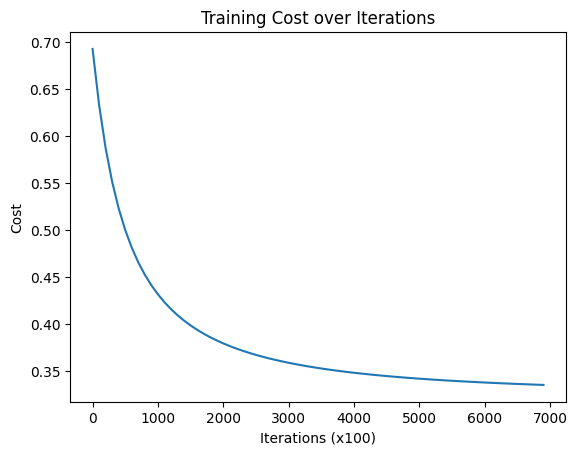

In [51]:
plt.plot(range(0, iterations, 100), cost_history)
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.title('Training Cost over Iterations')
plt.show()

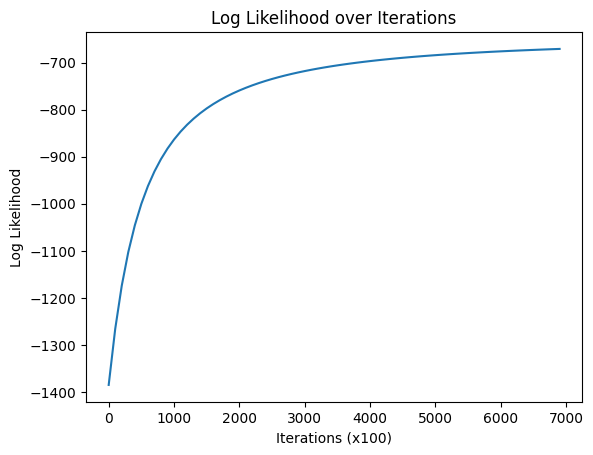

In [52]:
# Plot log likelihood
plt.plot(range(0, iterations, 100), log_history)
plt.xlabel('Iterations (x100)')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood over Iterations')
plt.show()

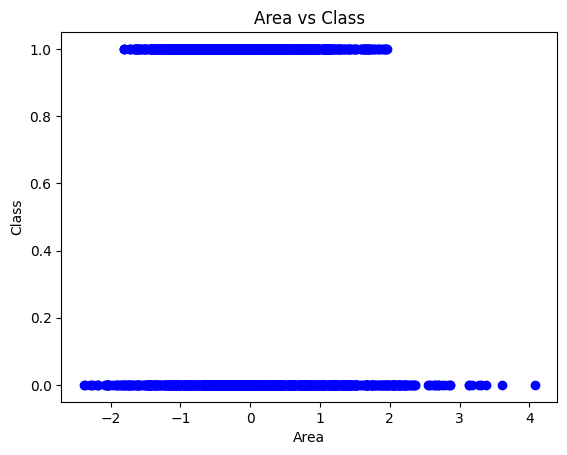

In [53]:
# Plotting feature against the class for visualization 
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.xlabel('Area')
plt.ylabel('Class')
plt.title('Area vs Class')
plt.show()